# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
#! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
#! unzip -nq "paintings.zip" 
#! rm "paintings.zip"
#! ls -l

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf

from PIL import Image
from collections import Counter
from tqdm import tqdm
from tensorflow.image import resize


In [3]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

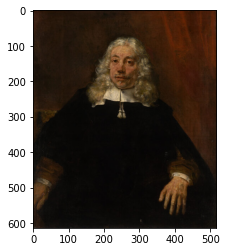

In [4]:
im = Image.open(dataset_paths[53])
plt.imshow(im);

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [5]:
print(f'type : {type(im)}, im_size : {im._size} , numpy shape : {np.array(im).shape}')
# numpy takes the height first, then the width

type : <class 'PIL.JpegImagePlugin.JpegImageFile'>, im_size : (517, 614) , numpy shape : (614, 517, 3)


In [6]:
im_np = np.array(im)
img_shape = im_np.shape
img_shape

(614, 517, 3)

In [7]:
img_dim = im_np.ndim
img_dim

3

❓ **What was in the image above?**

In [8]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [10]:
len(dataset_paths)

1085

In [11]:
dataset_images = [np.array(Image.open(path)) for path in dataset_paths]

In [12]:
len(dataset_images), dataset_images[53].shape

(1085, (614, 517, 3))

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [13]:
image_dimensions = [img.ndim for img in dataset_images]
image_dimensions[:10], image_dimensions[:10]

([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
Counter([img.ndim for img in dataset_images])

Counter({3: 1013, 2: 72})

In [15]:
"We might have 72 black and white pictures, with only 1 channel in the last dim"

'We might have 72 black and white pictures, with only 1 channel in the last dim'

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [16]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1122.03it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [17]:
Counter([img.shape for img in dataset_images])

Counter({(358, 434, 3): 1,
         (627, 604, 3): 1,
         (484, 307, 3): 1,
         (484, 352, 3): 4,
         (461, 614, 3): 9,
         (480, 626, 3): 1,
         (614, 467, 3): 2,
         (401, 479, 3): 1,
         (600, 450, 3): 1,
         (425, 618, 3): 1,
         (639, 381, 3): 1,
         (614, 463, 3): 1,
         (362, 480, 3): 1,
         (322, 384, 3): 1,
         (474, 614, 3): 1,
         (484, 368, 3): 1,
         (556, 614, 3): 1,
         (427, 614, 3): 1,
         (489, 614, 3): 1,
         (419, 614, 3): 1,
         (614, 449, 3): 5,
         (653, 261, 3): 1,
         (480, 317, 3): 1,
         (614, 469, 3): 2,
         (234, 312, 3): 4,
         (270, 181, 3): 1,
         (360, 273, 3): 1,
         (424, 300, 3): 1,
         (660, 520, 3): 1,
         (1229, 911, 3): 2,
         (787, 510, 3): 1,
         (299, 218, 3): 1,
         (573, 561, 3): 1,
         (971, 1214, 3): 1,
         (526, 343, 3): 1,
         (1229, 833, 3): 2,
         (586, 789, 3): 1

In [18]:
dataset_resized = [resize(image, [120,100]) for image in dataset_images]

In [19]:
len(dataset_resized), dataset_resized[0]

(1085,
 <tf.Tensor: shape=(120, 100, 3), dtype=float32, numpy=
 array([[[ 90.68917 ,  84.019165,  92.67917 ],
         [105.899086,  95.899086, 103.899086],
         [ 94.690414,  83.34042 ,  88.64041 ],
         ...,
         [113.0886  ,  80.0886  ,  89.07777 ],
         [116.95504 ,  84.95504 ,  87.975   ],
         [108.37742 ,  76.0474  ,  79.68754 ]],
 
        [[100.6815  ,  94.011505, 102.6715  ],
         [ 95.014   ,  85.014   ,  93.014   ],
         [103.6075  ,  92.2575  ,  97.557495],
         ...,
         [108.10137 ,  75.10137 ,  84.10137 ],
         [110.787186,  78.787186,  83.787186],
         [104.1102  ,  71.78018 ,  76.760284]],
 
        [[ 89.878334,  83.208336,  91.86833 ],
         [ 91.432915,  81.432915,  89.432915],
         [104.012505,  92.6625  ,  97.9625  ],
         ...,
         [103.09155 ,  70.09155 ,  79.76234 ],
         [101.14005 ,  68.14005 ,  75.15918 ],
         [ 97.67303 ,  64.384674,  73.59771 ]],
 
        ...,
 
        [[ 66.702095,  67

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [20]:
dataset_scaled =  [image/255. for image in dataset_resized]
dataset_scaled[0]

<tf.Tensor: shape=(120, 100, 3), dtype=float32, numpy=
array([[[0.3556438 , 0.32948694, 0.36344773],
        [0.41529053, 0.37607485, 0.4074474 ],
        [0.37133497, 0.3268252 , 0.34760946],
        ...,
        [0.4434847 , 0.31407294, 0.34932458],
        [0.45864722, 0.33315703, 0.345     ],
        [0.4250095 , 0.2982251 , 0.31250015]],

       [[0.39482942, 0.36867258, 0.40263334],
        [0.37260392, 0.33338824, 0.3647608 ],
        [0.4063039 , 0.3617941 , 0.3825784 ],
        ...,
        [0.42392695, 0.2945152 , 0.3298093 ],
        [0.43445954, 0.30896935, 0.3285772 ],
        [0.40827528, 0.28149092, 0.3010207 ]],

       [[0.35246405, 0.3263072 , 0.36026797],
        [0.35856044, 0.31934476, 0.3507173 ],
        [0.40789217, 0.36338234, 0.38416666],
        ...,
        [0.4042806 , 0.27486885, 0.31279346],
        [0.39662766, 0.2672159 , 0.29474187],
        [0.3830315 , 0.2524889 , 0.28861848]],

       ...,

       [[0.26157683, 0.26416507, 0.30726314],
        [0.39

In [21]:
np.max([tf.math.reduce_max(img).numpy() for img in dataset_scaled])

1.0

In [22]:
np.min([tf.math.reduce_min(img).numpy() for img in dataset_scaled])

0.0

In [23]:
print(type(dataset_scaled))
dataset_scaled = np.array(dataset_scaled)
print(type(dataset_scaled))

<class 'list'>
<class 'numpy.ndarray'>


👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [24]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

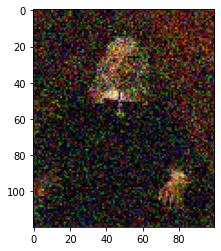

In [25]:
plt.imshow(dataset_noisy[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((868, 120, 100, 3),
 (217, 120, 100, 3),
 (868, 120, 100, 3),
 (217, 120, 100, 3))

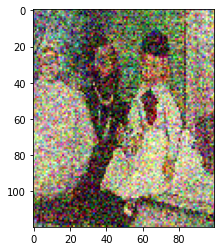

In [36]:
plt.imshow(dataset_noisy[530])

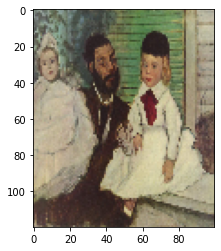

In [35]:
plt.imshow(dataset_scaled[530])

In [37]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [ ]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [ ]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = None

👉 **Test your encoder below**

In [ ]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [ ]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [ ]:
# YOUR CODE HERE

❓ **Plot your training and validation loss at each epoch using the cell below**

In [ ]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [ ]:
# YOUR CODE HERE

In [ ]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()